# Trying Raf's Sectionate Code
*Akira Di Sandro, 6/18/20*
<br>
In this notebook, I will be using Raf's Sectionate Code to make a zigzag across a diagonal cross section I want to make.

## 1. Import packages

In [27]:
%matplotlib inline
import sectionate
import xarray as xr

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
xr.set_options(display_style='html')
import intake
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

## 2. Load in Dataset

In [30]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [31]:
dog = col.search(source_id='GFDL-CM4', experiment_id='historical', table_id='Omon', variable_id=['uo','vo','wo'], grid_label='gn')

In [32]:
dset_dict = dog.to_dataset_dict(zarr_kwargs={'consolidated': True})
list(dset_dict.keys())

Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:01<00:00,  1.93s/it]


['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']

In [33]:
CM4_hist = dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']

## 3. Select Endpoints of Diagonal

In [34]:
diag_cs = CM4_hist.sel(time='2012').mean(dim='time').sel(member_id='r1i1p1f1', y=slice(-10.0,-7.0)).sel(x=slice(-211,-204))
diag_cs

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 35, x: 28, y: 12)
Coordinates:
    lon        (y, x) float32 dask.array<chunksize=(12, 28), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(12, 28), meta=np.ndarray>
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
  * x          (x) float64 -210.9 -210.7 -210.4 -210.2 ... -204.7 -204.5 -204.2
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * y          (y) float64 -9.95 -9.703 -9.457 -9.21 ... -7.726 -7.479 -7.231
  * bnds       (bnds) float64 1.0 2.0
    member_id  <U8 'r1i1p1f1'
Data variables:
    uo         (lev, y, x) float32 dask.array<chunksize=(35, 12, 28), meta=np.ndarray>
    vo         (lev, y, x) float32 dask.array<chunksize=(35, 12, 28), meta=np.ndarray>

In [35]:
#define starting point of diagonal as the top left point, (-211,-7)
startpt = [float(diag_cs.x[0]), float(diag_cs.y[-1])]
#define end point of diagonal as the bottom right point, (-202,-10)
endpt = [float(diag_cs.x[-1]), float(diag_cs.y[0])]

In [36]:
#pick 2 points
lon1 = float(diag_cs.x[0]) ; lat1 = float(diag_cs.y[-1])
lon2 = float(diag_cs.x[-1]) ; lat2 = float(diag_cs.y[0])

## 4. Getting to Business

In [37]:
isec, jsec, xsec, ysec = sectionate.create_section(CM4_hist['lon'], CM4_hist['lat'], lon1, lat1, lon2, lat2)

best fit is rounding down


ValueError: too many values to unpack (expected 2)

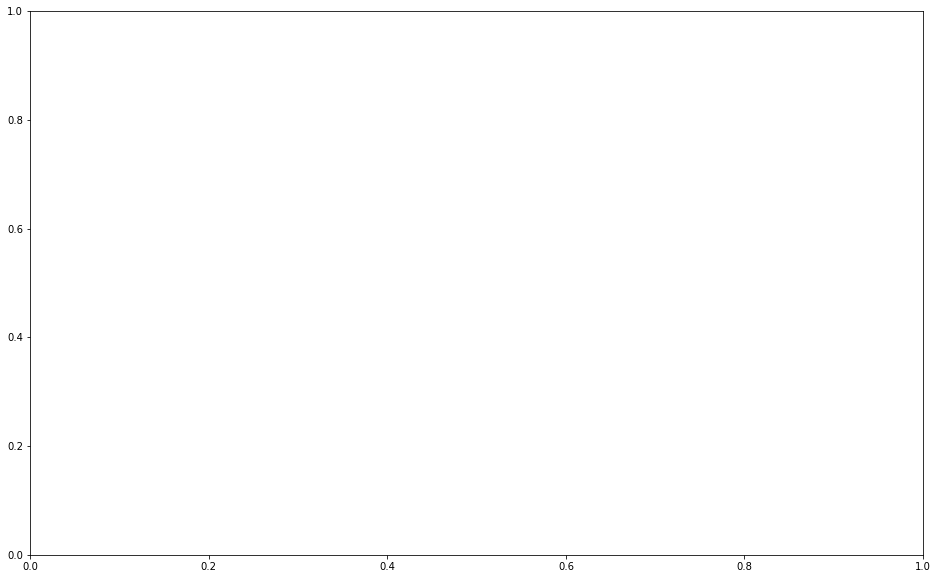

In [38]:
plt.figure(figsize=[16,10])
plt.pcolormesh(CM4_hist['lon'], CM4_hist['lat'], CM4_hist['uo'].isel(time=0).sel(lev=2.5))
plt.plot(xsec, ysec)
plt.axis([-211,-203, -10, -7])
plt.show()